เพิ่มเติม : https://wellsr.com/python/upsampling-and-downsampling-imbalanced-data-in-python/
- SHAP https://www.kaggle.com/code/pakkanmeric/bank-marketing-imbalanced-dataset-oversampling
- Feature Selection
- Gridsearch -- Finetune  | Randomforest
- แบ่งกลุ่ม balance
- downsampling

# 1. Read and Explore Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import os
from IPython.core.display import HTML

In [2]:
import warnings
from plotly.subplots import make_subplots
import pickle
import plotly.graph_objects as go
import plotly.express as px 
from sklearn.svm import SVC
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank-full.csv',delimiter=';')

In [4]:
print(f'bank marketing data size : {df.shape[0]} x {df.shape[1]}')

bank marketing data size : 45211 x 17


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

## 2.3 Group Numerical/ Continous (Choice)

In [7]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 20, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 20) & (dataframe['age'] <= 30), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 30) & (dataframe['age'] <= 40), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 40) & (dataframe['age'] <= 55), 'age'] = 4
    dataframe.loc[dataframe['age'] > 55, 'age'] = 5
               
    return dataframe

#age(bank_client) ;

In [8]:
# Calculating Quantile Rank of balance
df['QuantileRank']= pd.qcut(df['balance'], q = 4, labels = False)
 
# printing the dataframe
#print(df)

## 2.4 Drop Duration (Choice)

In [9]:
df = df.drop(columns='duration')
#df.head()

In [10]:
df = df.drop(columns='balance')

In [11]:
df.rename(columns = {'QuantileRank':'balance'}, inplace = True)

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,balance
0,58,management,married,tertiary,no,yes,no,unknown,5,may,1,-1,0,unknown,no,3
1,44,technician,single,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,1,-1,0,unknown,no,3
4,33,unknown,single,unknown,no,no,no,unknown,5,may,1,-1,0,unknown,no,0


# 3.2 Downsampling - RandomOverSampler

### Standardization

In [13]:
cats_vars = ['job', 'marital', 'education', 'default','housing','loan','contact','day','month','poutcome','y']
num_vars = ['age','balance','duration','campaign','pdays','previous']

In [14]:
from sklearn.preprocessing import RobustScaler
# make a copy of dataset to scaling
bank_scale=df.copy()

# remove 'pdays' and 'default' columns
#bank_scale= df.drop(['pdays', 'default'], axis=1)

bank_scale.y.replace(('yes', 'no'), (1, 0), inplace=True)

# standardization for just numerical variables 
#categorical_cols= ['job', 'marital', 'education', 'default','housing','loan','contact','day','month','poutcome','y']
feature_scale=[feature for feature in bank_scale.columns if feature in num_vars]

scaler=StandardScaler()
#scaler = RobustScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [15]:
scaled_data = pd.concat([bank_scale[cats_vars].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)

categorical_cols1= ['job', 'marital', 'education', 'default','housing','loan','contact','day','month','poutcome']
scaled_data= pd.get_dummies(scaled_data, columns = categorical_cols1, drop_first=True)
scaled_data.head()

,y,age,campaign,pdays,previous,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,1.606965,-0.569351,-0.411453,-0.25194,1.341884,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0.288529,-0.569351,-0.411453,-0.25194,-1.340994,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,-0.747384,-0.569351,-0.411453,-0.25194,-1.340994,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0.571051,-0.569351,-0.411453,-0.25194,1.341884,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,-0.747384,-0.569351,-0.411453,-0.25194,-1.340994,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


### Downsampling

In [16]:
trial = pd.DataFrame(scaled_data)
trial['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [17]:
yes_y = trial[trial['y'] == 1]
no_y  = trial[trial['y'] == 0]
print(yes_y.shape)
print(no_y.shape)

(5289, 71)
(39922, 71)


In [18]:
from sklearn.utils import resample
y_downsample = resample(no_y,
             replace=True,
             n_samples=len(yes_y),
             random_state=42)

print(y_downsample.shape)

(5289, 71)


1    5289
0    5289
Name: y, dtype: int64


<AxesSubplot:ylabel='Type'>

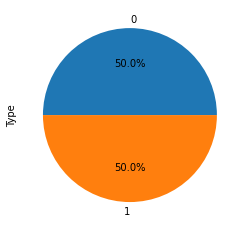

In [19]:
data_downsampled = pd.concat([y_downsample, yes_y])

print(data_downsampled["y"].value_counts())

data_downsampled.groupby('y').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [20]:
data_downsampled['y'].value_counts()

1    5289
0    5289
Name: y, dtype: int64

### Train/Test Split

In [21]:
data_downsampled.shape

(10578, 71)

In [22]:
X = data_downsampled.iloc[:,1:]
Y = data_downsampled.iloc[:,-0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

In [23]:
X

,age,campaign,pdays,previous,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
16514,0.100181,0.399020,-0.411453,-0.251940,1.341884,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
876,-0.370689,-0.569351,-0.411453,-0.251940,-0.446701,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
41667,1.230269,-0.246560,0.677157,0.182198,1.341884,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
11710,1.606965,-0.246560,-0.411453,-0.251940,0.447591,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6465,-1.029906,0.076230,-0.411453,-0.251940,-1.340994,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,3.019575,-0.569351,-0.001976,3.221163,1.341884,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
45205,-1.500776,-0.246560,-0.411453,-0.251940,0.447591,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45206,0.947747,0.076230,-0.411453,-0.251940,0.447591,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45207,2.831227,-0.246560,-0.411453,-0.251940,1.341884,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [24]:
print('X_train shape = ',X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ',X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (7933, 70)
y_train shape =  (7933,)
X_test shape =  (2645, 70)
y_test shape =  (2645,)


# 5. Building Model 

## 5.1 Logistic Regression

In [25]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1',  solver='liblinear')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [26]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.701323,0.745081,0.622571,0.678339


## 5.2 RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=12)
rfc.fit(X_train, y_train)
rfcpredictions = rfc.predict(X_test)
#print("Predicted value: ", rfcpredictions[:10])
#print("Actual value: ", y_test[:10])

In [28]:
acc = accuracy_score(y_test, rfcpredictions)
prec = precision_score(y_test, rfcpredictions)
rec = recall_score(y_test, rfcpredictions)
f1 = f1_score(y_test, rfcpredictions)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.701323,0.745081,0.622571,0.678339
1,Random Forest,0.730057,0.775618,0.656203,0.710931


## 5.3 DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtcprediction = dtc.predict(X_test)
#print("Predicted value: ", dtcprediction[:10])
#print("Actual value: ", y_test[:10])

In [30]:
acc = accuracy_score(y_test, dtcprediction)
prec = precision_score(y_test, dtcprediction)
rec = recall_score(y_test, dtcprediction)
f1 = f1_score(y_test, dtcprediction)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.701323,0.745081,0.622571,0.678339
1,Random Forest,0.730057,0.775618,0.656203,0.710931
2,Decision Tree,0.661248,0.670788,0.648729,0.659574


## 5.5 GradientBoostingClassifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
clfpred = clf.predict(X_test)

In [33]:
acc = accuracy_score(y_test, clfpred)
prec = precision_score(y_test, clfpred)
rec = recall_score(y_test, clfpred)
f1 = f1_score(y_test, clfpred)

model_results = pd.DataFrame([['Gradient Boosting Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.701323,0.745081,0.622571,0.678339
1,Random Forest,0.730057,0.775618,0.656203,0.710931
2,Decision Tree,0.661248,0.670788,0.648729,0.659574
3,Gradient Boosting Classifier,0.722873,0.784572,0.623318,0.694711


# Evaluate

## Random Forest

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [35]:
#Random FOrest
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}


In [36]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rfc_random.fit(X_train, y_train)

In [40]:
#rfc_random.best_params_

In [97]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [41]:
rfc_best_model = RandomForestClassifier(n_estimators= 200, min_samples_split = 2, min_samples_leaf = 1,
                                        max_features= 'sqrt', max_depth = 31, random_state=42)

#base_model = RandomForestClassifier(n_estimators= 200,min_samples_split=10,min_samples_leaf=1,
#                                    max_features='sqrt',max_depth= 30,bootstrap= False)

rfc_best_model.fit(X_train, y_train)
#base_accuracy = evaluate(base_model, X_test, y_test)

RandomForestClassifier(max_depth=31, max_features='sqrt', n_estimators=200,
                       random_state=42)

In [42]:
pred = rfc_best_model.predict(X_test)

In [43]:
acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

model_results = pd.DataFrame([['eval_RandomForest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.701323,0.745081,0.622571,0.678339
1,Random Forest,0.730057,0.775618,0.656203,0.710931
2,Decision Tree,0.661248,0.670788,0.648729,0.659574
3,Gradient Boosting Classifier,0.722873,0.784572,0.623318,0.694711
4,eval_RandomForest,0.733081,0.781139,0.656203,0.713241


##  GradientBoostingClassifier

In [44]:
#Random FOrest
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [45]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 80, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
pprint(random_grid)

{'max_depth': [10, 17, 24, 31, 38, 45, 52, 59, 66, 73, 80, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 333, 466, 600, 733, 866, 1000, 1133, 1266, 1400]}


In [118]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 17, 24, 31, 38, 45,
                                                      52, 59, 66, 73, 80,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 333, 466, 600,
                                                         733, 866, 1000, 1133,
                                                         1266, 1400]},
                   random_state=42, verbose=2)

In [130]:
rfc_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 31}

In [46]:
clf_best_model = GradientBoostingClassifier(n_estimators= 200, min_samples_split = 2, min_samples_leaf = 1,
                                            max_features= 'sqrt', max_depth = 31, random_state=42)

#base_model = RandomForestClassifier(n_estimators= 200,min_samples_split=10,min_samples_leaf=1,
#                                    max_features='sqrt',max_depth= 30,bootstrap= False)

clf_best_model.fit(X_train, y_train)
#base_accuracy = evaluate(base_model, X_test, y_test)

GradientBoostingClassifier(max_depth=31, max_features='sqrt', n_estimators=200,
                           random_state=42)

In [47]:
pred_eval = clf_best_model.predict(X_test)

In [48]:
acc = accuracy_score(y_test, pred_eval)
prec = precision_score(y_test, pred_eval)
rec = recall_score(y_test, pred_eval)
f1 = f1_score(y_test, pred_eval)

model_results = pd.DataFrame([['eval_GradientBoosting', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.701323,0.745081,0.622571,0.678339
1,Random Forest,0.730057,0.775618,0.656203,0.710931
2,Decision Tree,0.661248,0.670788,0.648729,0.659574
3,Gradient Boosting Classifier,0.722873,0.784572,0.623318,0.694711
4,eval_RandomForest,0.733081,0.781139,0.656203,0.713241
5,eval_GradientBoosting,0.724008,0.757627,0.668161,0.710087


# Visualize Model Decision

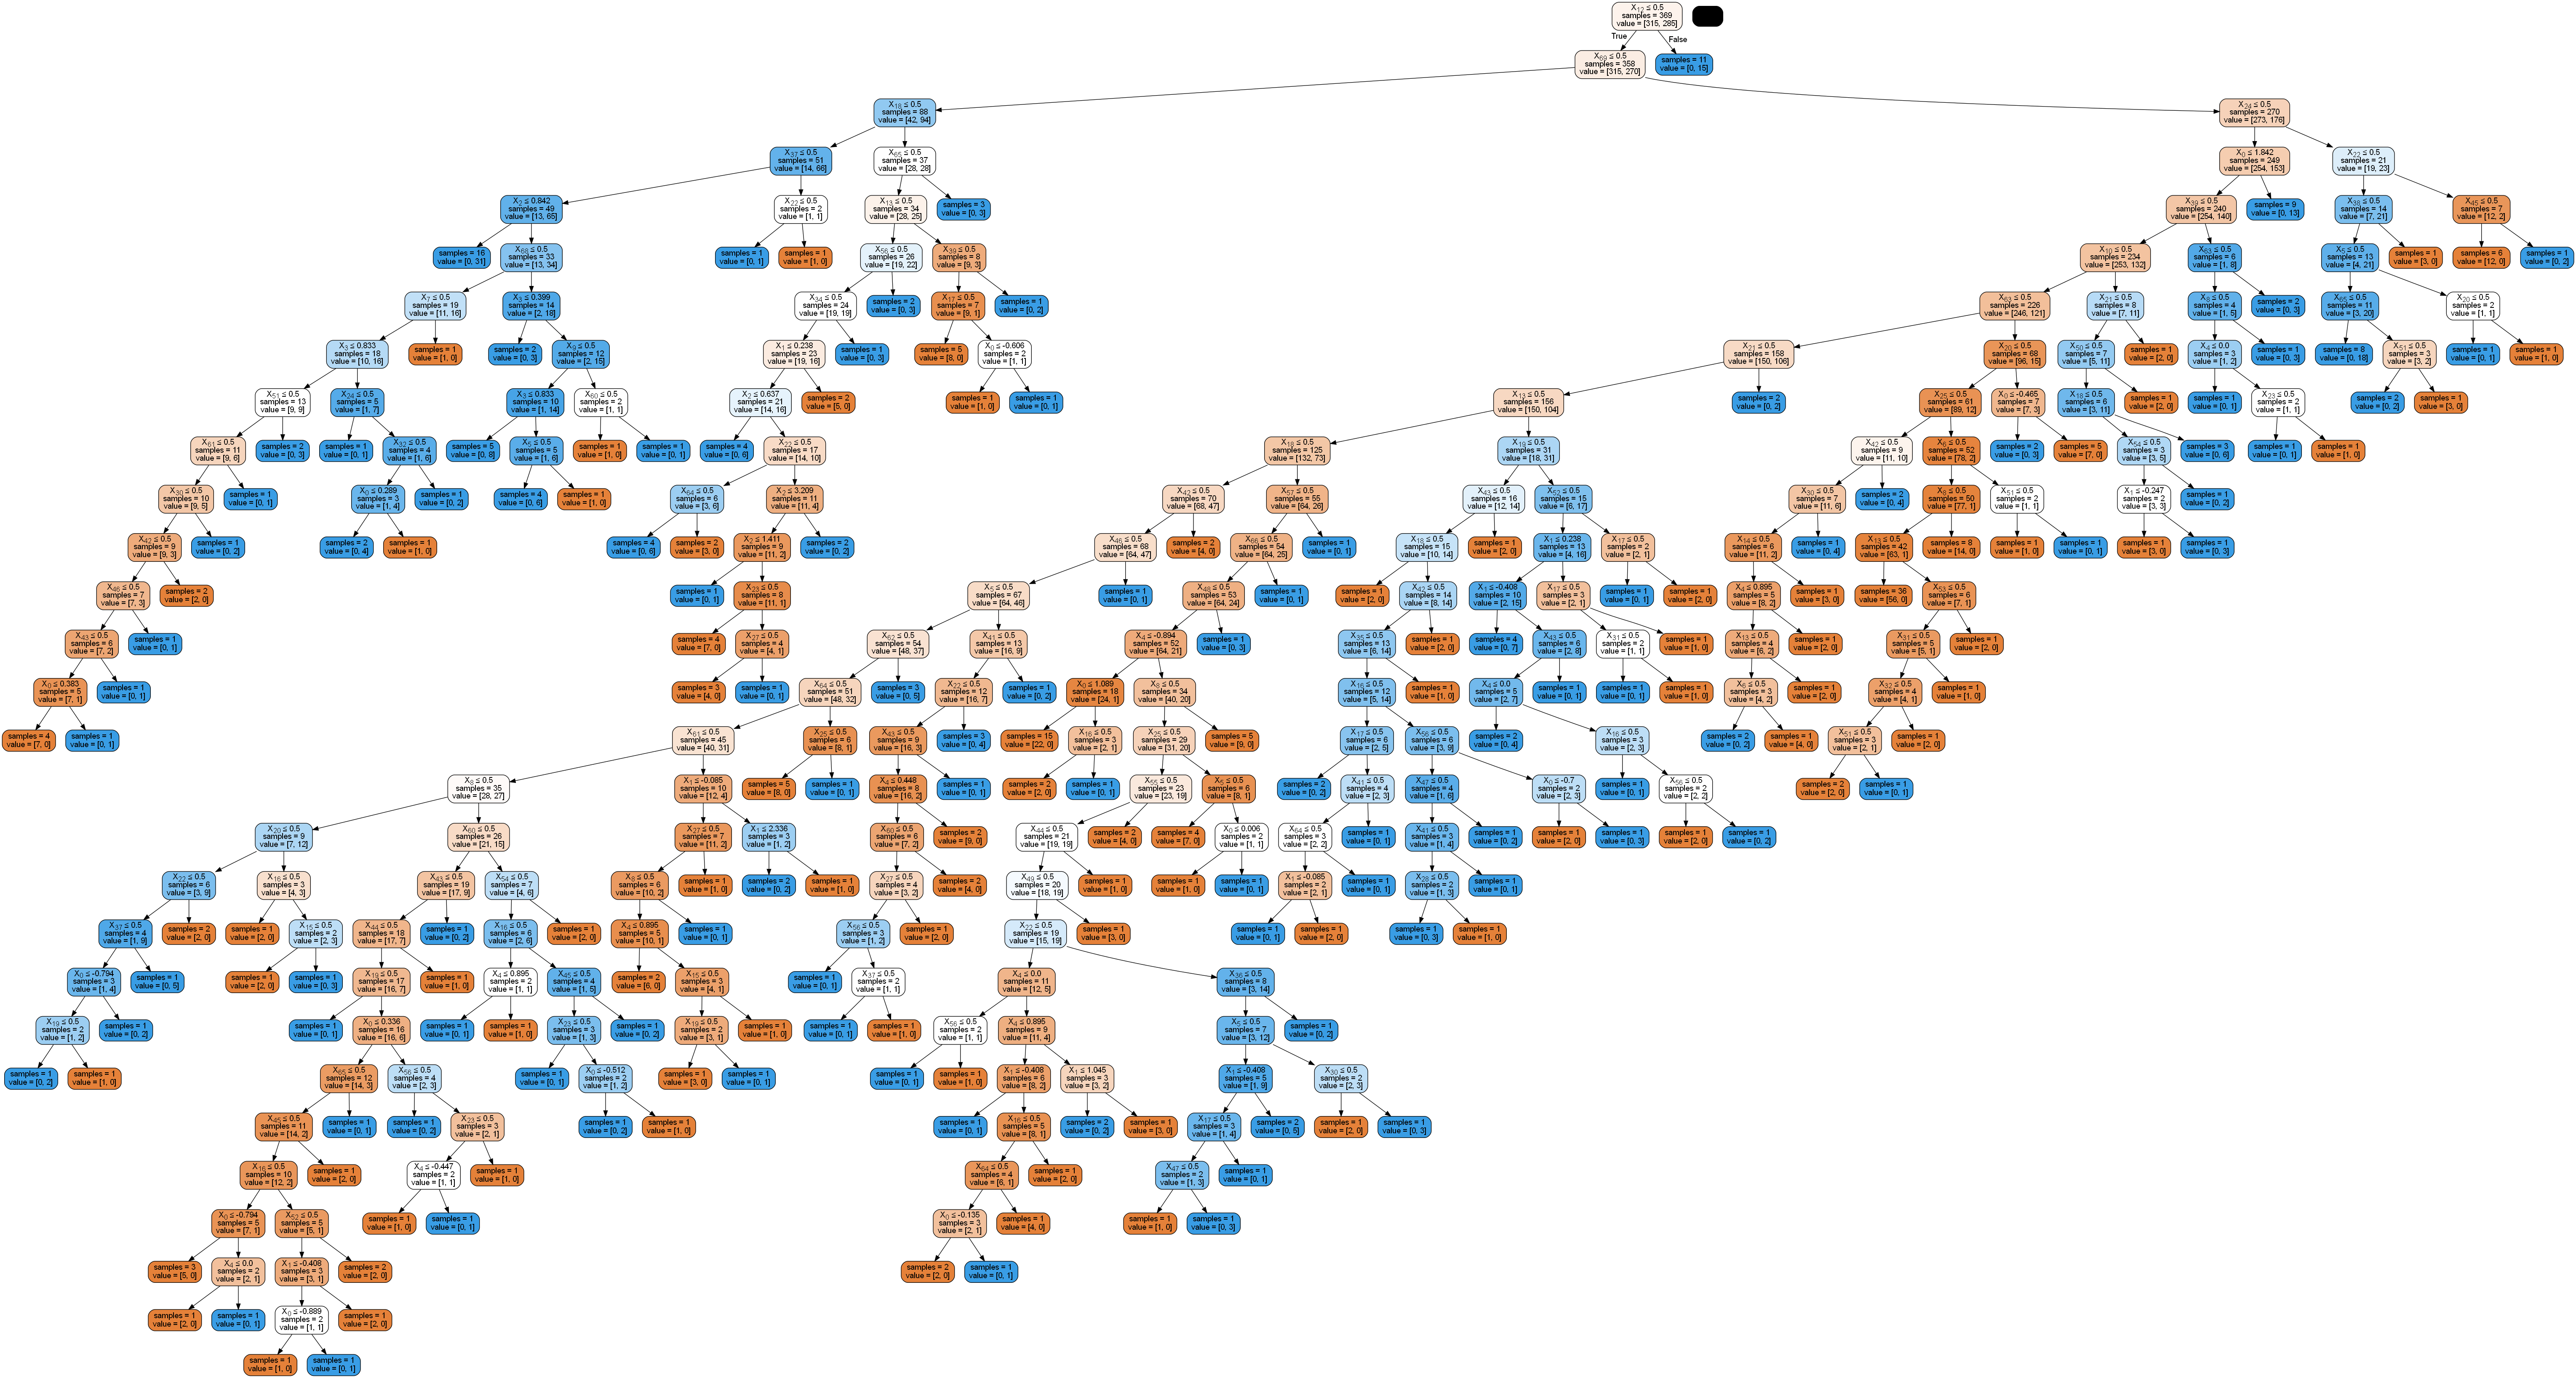

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
import numpy as np

# Classifier
#clf = GradientBoostingClassifier(max_depth=3, random_state=0)
#fc_best_model.fit(X_train, y_train)
rfc_best_model.fit(X_train[:600], y_train[:600])

# Get the tree number 42
sub_tree_42 = rfc_best_model.estimators_[42]

# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('./out.png').write_bytes(png)
# Display
Image(png)

# Feature Important

In [49]:
print('RFC Confusion Matrix\n', confusion_matrix(y_test, pred_eval))

RFC Confusion Matrix
 [[1021  286]
 [ 444  894]]


In [50]:
acc = accuracy_score(y_test, pred_eval)
prec = precision_score(y_test, pred_eval)
rec = recall_score(y_test, pred_eval)
f1 = f1_score(y_test, pred_eval)

model_results = pd.DataFrame([['eval_clf', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,eval_clf,0.724008,0.757627,0.668161,0.710087


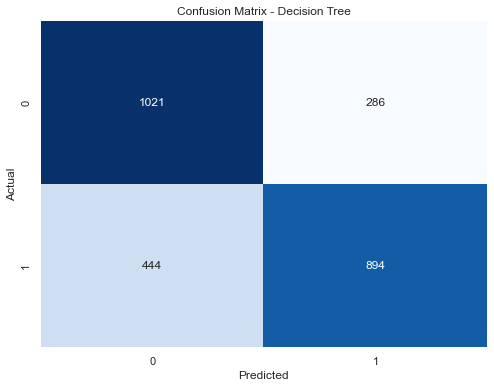

In [51]:
#print confusion matrix
cm = confusion_matrix(y_test, pred_eval)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

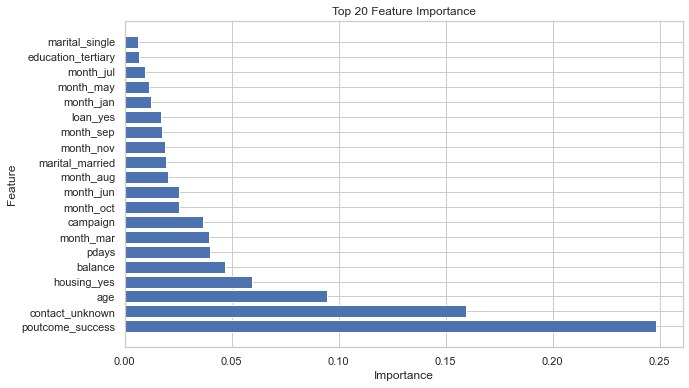

In [52]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 most important features
top_features = feature_importance_df.head(20)
#top_features = feature_importance_df

# Plot feature importances for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance')
plt.show()

## SHAP Values

In [53]:
from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier()
model_clf = clf.fit(X_train, y_train)
y_train_clf = model_clf.predict(X_train)
y_test_clf = model_clf.predict(X_test)
#print("Predicted value: ", rfcpredictions[:10])
#print("Actual value: ", y_test[:10])

print(confusion_matrix(y_test,y_test_clf))
print(classification_report(y_test,y_test_clf, digits=3))

print('Train accuracy: %0.3f' % accuracy_score(y_train, y_train_clf))
print('Test accuracy: %0.3f' % accuracy_score(y_test, y_test_clf))

print('Train AUC: %0.3f' % roc_auc_score(y_train, y_train_clf))
print('Test AUC: %0.3f' % roc_auc_score(y_test, y_test_clf))

[[1078  229]
 [ 504  834]]
              precision    recall  f1-score   support

           0      0.681     0.825     0.746      1307
           1      0.785     0.623     0.695      1338

    accuracy                          0.723      2645
   macro avg      0.733     0.724     0.720      2645
weighted avg      0.734     0.723     0.720      2645

Train accuracy: 0.743
Test accuracy: 0.723
Train AUC: 0.743
Test AUC: 0.724


In [54]:
import shap
expl_clf = shap.TreeExplainer(model_clf)
shap_clf = expl_clf.shap_values(X_train)

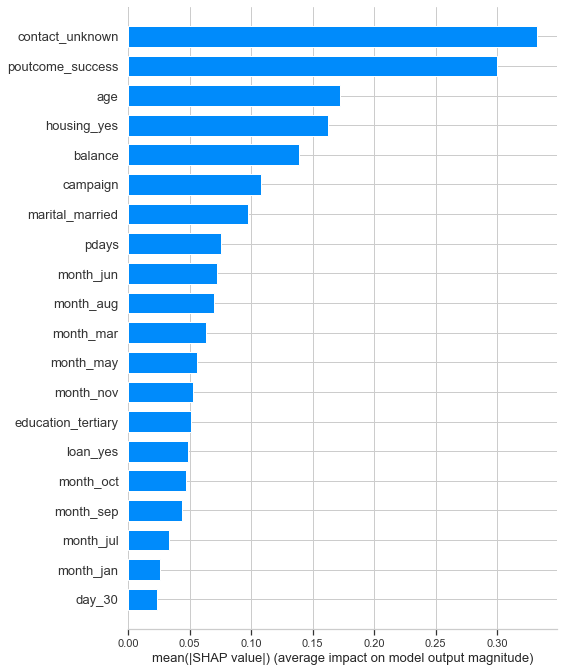

In [55]:
shap.summary_plot(shap_clf, X_train, plot_type="bar")

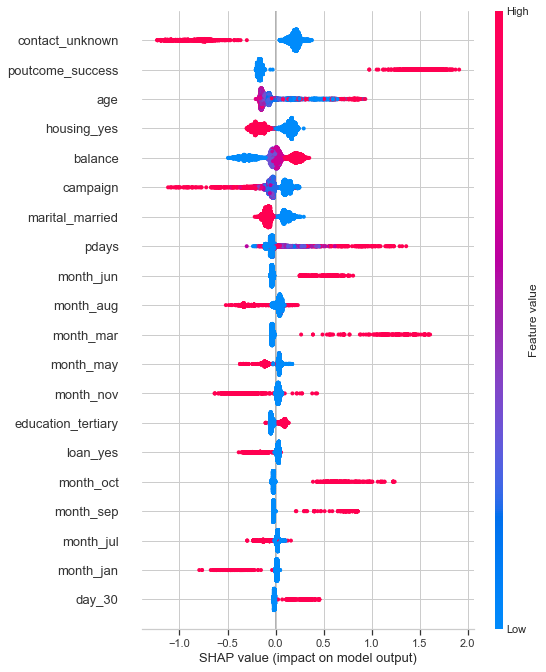

In [56]:
shap.summary_plot(shap_clf, X_train)

In [57]:
shap.initjs()
shap.force_plot(expl_clf.expected_value, shap_clf[1050,:], X_train.iloc[1050,:], link='logit')

In [58]:
shap.initjs()
shap.force_plot(expl_clf.expected_value, shap_clf[4000,:], X_train.iloc[4000,:], link='logit')

In [59]:
# base value
y_train.mean()

0.4980461363922854

In [60]:
pd.DataFrame(X_train.iloc[4000,]).T

,age,campaign,pdays,previous,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
40555,-1.783298,-0.569351,-0.411453,-0.25194,-0.446701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Feature Selection

## Forward selection

In [171]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs = SFS(GradientBoostingClassifier(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [172]:
sfs.fit(X, Y)
sfs.k_feature_names_     # to get the final set of features

('age',
 'pdays',
 'balance',
 'housing_yes',
 'contact_unknown',
 'day_30',
 'month_jun',
 'month_mar',
 'month_oct',
 'month_sep',
 'poutcome_success')

### Additional Note

In [ ]:
sfs1 = SFS(GradientBoostingClassifier(),
         k_features=(3,11),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, Y)

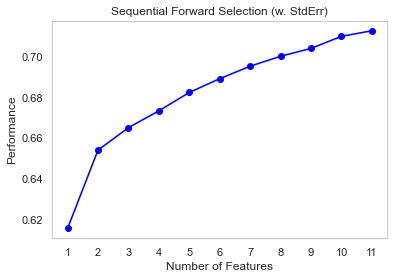

In [177]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

## Bi-directional elimination(Step-wise Selection)

In [178]:
# Sequential Forward Floating Selection(sffs)
sffs = SFS(GradientBoostingClassifier(),
         k_features=(3,11),
         forward=True,
         floating=True,
         cv=0)

In [179]:
sffs.fit(X, Y)
sffs.k_feature_names_

('age',
 'pdays',
 'balance',
 'housing_yes',
 'contact_unknown',
 'day_30',
 'month_jun',
 'month_mar',
 'month_oct',
 'month_sep',
 'poutcome_success')

# Evaluate from Features Selection

In [61]:
df = pd.read_csv('bank-full.csv',delimiter=';')

In [62]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#### Features Selection
('age',
 'pdays',
 'balance',
 'housing_yes',
 'contact_unknown',
 'day_30',
 'month_jun',
 'month_mar',
 'month_oct',
 'month_sep',
 'poutcome_success')

## New Features

In [63]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 20, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 20) & (dataframe['age'] <= 30), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 30) & (dataframe['age'] <= 40), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 40) & (dataframe['age'] <= 55), 'age'] = 4
    dataframe.loc[dataframe['age'] > 55, 'age'] = 5
               
    return dataframe

#age(bank_client) ;

In [64]:
# Calculating Quantile Rank of balance
df['QuantileRank']= pd.qcut(df['balance'], q = 4, labels = False)
 
# printing the dataframe
#print(df)

In [65]:
df = df.drop(columns='balance')

In [66]:
df.rename(columns = {'QuantileRank':'balance'}, inplace = True)

In [67]:
df = df.drop(columns='duration')
#df.head()

## Standadization

In [68]:
cats_vars = ['job', 'marital', 'education', 'default','housing','loan','contact','day','month','poutcome','y']
num_vars = ['age','balance','duration','campaign','pdays','previous']

In [69]:
#from sklearn.preprocessing import RobustScaler
# make a copy of dataset to scaling
bank_scale=df.copy()

# remove 'pdays' and 'default' columns
#bank_scale= df.drop(['pdays', 'default'], axis=1)

bank_scale.y.replace(('yes', 'no'), (1, 0), inplace=True)

# standardization for just numerical variables 
#categorical_cols= ['job', 'marital', 'education', 'default','housing','loan','contact','day','month','poutcome','y']
feature_scale=[feature for feature in bank_scale.columns if feature in num_vars]

scaler=StandardScaler()
#scaler = RobustScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [70]:
scaled_data = pd.concat([bank_scale[cats_vars].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)

categorical_cols1= ['job', 'marital', 'education', 'default','housing','loan','contact','day','month','poutcome']
scaled_data= pd.get_dummies(scaled_data, columns = categorical_cols1, drop_first=True)
scaled_data.head()

,y,age,campaign,pdays,previous,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,1.606965,-0.569351,-0.411453,-0.25194,1.341884,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0.288529,-0.569351,-0.411453,-0.25194,-1.340994,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,-0.747384,-0.569351,-0.411453,-0.25194,-1.340994,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0.571051,-0.569351,-0.411453,-0.25194,1.341884,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,-0.747384,-0.569351,-0.411453,-0.25194,-1.340994,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## Downsampling

In [71]:
trial = pd.DataFrame(scaled_data)
trial['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [72]:
yes_y = trial[trial['y'] == 1]
no_y  = trial[trial['y'] == 0]
print(yes_y.shape)
print(no_y.shape)

(5289, 71)
(39922, 71)


In [73]:
from sklearn.utils import resample
y_downsample = resample(no_y,
             replace=True,
             n_samples=len(yes_y),
             random_state=42)

print(y_downsample.shape)

(5289, 71)


1    5289
0    5289
Name: y, dtype: int64


<AxesSubplot:ylabel='Type'>

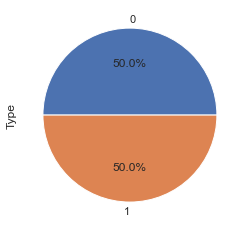

In [74]:
data_downsampled = pd.concat([y_downsample, yes_y])

print(data_downsampled["y"].value_counts())

data_downsampled.groupby('y').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [75]:
data_downsampled.shape

(10578, 71)

## Features Selection

In [76]:
df2 = data_downsampled.filter(['y','age', 'pdays', 'balance', 'housing_yes', 'contact_unknown', 'day_30', 'month_jun', 
                              'month_mar', 'month_oct', 'month_sep', 'poutcome_success'], axis=1)

In [77]:
df2

,y,age,pdays,balance,housing_yes,contact_unknown,day_30,month_jun,month_mar,month_oct,month_sep,poutcome_success
16514,0,0.100181,-0.411453,1.341884,1,0,0,0,0,0,0,0
876,0,-0.370689,-0.411453,-0.446701,1,1,0,0,0,0,0,0
41667,0,1.230269,0.677157,1.341884,0,0,0,0,0,1,0,0
11710,0,1.606965,-0.411453,0.447591,0,1,0,1,0,0,0,0
6465,0,-1.029906,-0.411453,-1.340994,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45204,1,3.019575,-0.001976,1.341884,0,0,0,0,0,0,0,0
45205,1,-1.500776,-0.411453,0.447591,0,0,0,0,0,0,0,0
45206,1,0.947747,-0.411453,0.447591,0,0,0,0,0,0,0,0
45207,1,2.831227,-0.411453,1.341884,0,0,0,0,0,0,0,0


In [78]:
df2.shape

(10578, 12)

# Building Model

## Train/Test Split

In [79]:
X_eval = df2.iloc[:,1:]
Y_eval = df2.iloc[:,-0]

X_train_eval, X_test_eval, y_train_eval, y_test_eval = train_test_split(X_eval, Y_eval, test_size=0.25, random_state=2)

In [80]:
print('X_train shape = ',X_train_eval.shape)
print('y_train shape = ', y_train_eval.shape)
print('X_test shape = ',X_test_eval.shape)
print('y_test shape = ', y_test_eval.shape)

X_train shape =  (7933, 11)
y_train shape =  (7933,)
X_test shape =  (2645, 11)
y_test shape =  (2645,)


In [81]:
Y_eval.value_counts()

1    5289
0    5289
Name: y, dtype: int64

## Logistic Regression

In [82]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1',  solver='liblinear')
classifier.fit(X_train_eval, y_train_eval)

# Predicting Test Set
y_pred_eval = classifier.predict(X_test_eval)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test_eval, y_pred_eval)
prec = precision_score(y_test_eval, y_pred_eval)
rec = recall_score(y_test_eval, y_pred_eval)
f1 = f1_score(y_test_eval, y_pred_eval)

results = pd.DataFrame([['Logistic Regression_eval', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression_eval,0.689603,0.751704,0.576981,0.652854


## RandomForestClassifier

In [83]:
rfc_eval = RandomForestClassifier(random_state = 12)
rfc_eval.fit(X_train_eval, y_train_eval)

# Predicting Test Set
rfcpred_eval = rfc_eval.predict(X_test_eval)

acc = accuracy_score(y_test_eval, rfcpred_eval)
prec = precision_score(y_test_eval, rfcpred_eval)
rec = recall_score(y_test_eval, rfcpred_eval)
f1 = f1_score(y_test_eval, rfcpred_eval)

model_results = pd.DataFrame([['RandomForest_eval', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression_eval,0.689603,0.751704,0.576981,0.652854
1,RandomForest_eval,0.679773,0.715162,0.609865,0.658330


## GradientBoostingClassifier

In [84]:
clf_eval = GradientBoostingClassifier(random_state = 42)
clf_eval.fit(X_train_eval, y_train_eval)

# Predicting Test Set
clfpred_eval = clf_eval.predict(X_test_eval)

acc = accuracy_score(y_test_eval, clfpred_eval)
prec = precision_score(y_test_eval, clfpred_eval)
rec = recall_score(y_test_eval, clfpred_eval)
f1 = f1_score(y_test_eval, clfpred_eval)

model_results = pd.DataFrame([['GradientBoostingClassifier_eval', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression_eval,0.689603,0.751704,0.576981,0.652854
1,RandomForest_eval,0.679773,0.715162,0.609865,0.658330
2,GradientBoostingClassifier_eval,0.706994,0.775171,0.592676,0.671749


## DecisionTreeClassifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_eval, y_train_eval)

# Predicting Test Set
dtcprediction = dtc.predict(X_test_eval)

acc = accuracy_score(y_test_eval, dtcprediction)
prec = precision_score(y_test_eval, dtcprediction)
rec = recall_score(y_test_eval, dtcprediction)
f1 = f1_score(y_test_eval, dtcprediction)

model_results = pd.DataFrame([['DecisionTreeClassifier_eval', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression_eval,0.689603,0.751704,0.576981,0.652854
1,RandomForest_eval,0.679773,0.715162,0.609865,0.658330
2,GradientBoostingClassifier_eval,0.706994,0.775171,0.592676,0.671749
3,DecisionTreeClassifier_eval,0.667297,0.719349,0.561286,0.630563


## Best Model RFC

In [86]:
model_clf = clf.fit(X_train, y_train)
y_train_clf = model_clf.predict(X_train)
y_test_clf = model_clf.predict(X_test)

print(confusion_matrix(y_test_eval,y_test_clf))
print(classification_report(y_test_eval,y_test_clf, digits=3))

[[1078  229]
 [ 504  834]]
              precision    recall  f1-score   support

           0      0.681     0.825     0.746      1307
           1      0.785     0.623     0.695      1338

    accuracy                          0.723      2645
   macro avg      0.733     0.724     0.720      2645
weighted avg      0.734     0.723     0.720      2645



In [87]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test_eval, rfcpred_eval, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.65      0.75      0.70      1307
     class 1       0.72      0.61      0.66      1338

    accuracy                           0.68      2645
   macro avg       0.68      0.68      0.68      2645
weighted avg       0.68      0.68      0.68      2645



In [88]:
model_rfc_eval = rfc_eval.fit(X_train_eval, y_train_eval)
y_train_rfc_eval = model_rfc_eval.predict(X_train_eval)
y_test_rfc_eval = model_rfc_eval.predict(X_test_eval)

print(confusion_matrix(y_test_eval,y_test_rfc_eval))
print(classification_report(y_test_eval,y_test_rfc_eval, digits=3))

[[982 325]
 [522 816]]
              precision    recall  f1-score   support

           0      0.653     0.751     0.699      1307
           1      0.715     0.610     0.658      1338

    accuracy                          0.680      2645
   macro avg      0.684     0.681     0.679      2645
weighted avg      0.684     0.680     0.678      2645



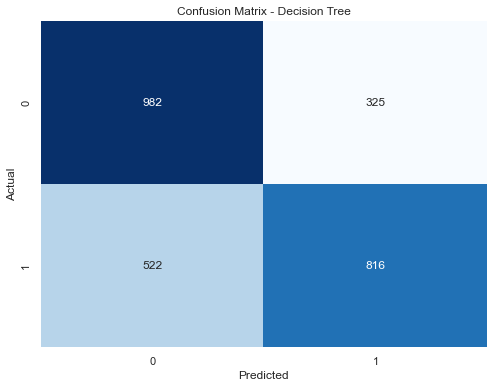

In [89]:
#print confusion matrix
cm = confusion_matrix(y_test_eval, rfcpred_eval)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Evaluate GradientBoostingClassifier

In [90]:
import sklearn
sklearn.__version__

'0.24.2'

In [91]:
#Random FOrest
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [92]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 11)]
# Number of features to consider at every split
max_features = ['auto','sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 25, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# loss
loss = ['exponential','deviance']
#criterion
criterion = ['friedman_mse','mse']
#learning_rate
learning_rate = [0.1,0.075,0.05] 


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'loss' : loss,
               'criterion' : criterion,
               'learning_rate' : learning_rate}
pprint(random_grid)

{'criterion': ['friedman_mse', 'mse'],
 'learning_rate': [0.1, 0.075, 0.05],
 'loss': ['exponential', 'deviance'],
 'max_depth': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 230, 260, 290, 320, 350, 380, 410, 440, 470, 500]}


In [94]:
clf = GradientBoostingClassifier()
clf_random_eval = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                                     verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#clf_random_eval.fit(X_train_eval, y_train_eval)

In [150]:
clf_random_eval.best_params_

{'n_estimators': 350,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 5,
 'loss': 'exponential',
 'learning_rate': 0.05,
 'criterion': 'mse'}

In [95]:
#best Hyperparameter
clf_finetune = GradientBoostingClassifier(n_estimators= 320, min_samples_split = 3, min_samples_leaf = 6, criterion= 'mse',
                                            max_features= 'sqrt', max_depth = 5, random_state=0, learning_rate=0.05, loss = 'exponential')
clf_finetune.fit(X_train_eval, y_train_eval)

# Predicting Test Set
clfpred_finetue = clf_finetune.predict(X_test_eval)

acc = accuracy_score(y_test_eval, clfpred_finetue)
prec = precision_score(y_test_eval, clfpred_finetue)
rec = recall_score(y_test_eval, clfpred_finetue)
f1 = f1_score(y_test_eval, clfpred_finetue)

model_results = pd.DataFrame([['GradientBoostingClassifier_Finetune', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression_eval,0.689603,0.751704,0.576981,0.652854
1,RandomForest_eval,0.679773,0.715162,0.609865,0.658330
2,GradientBoostingClassifier_eval,0.706994,0.775171,0.592676,0.671749
3,DecisionTreeClassifier_eval,0.667297,0.719349,0.561286,0.630563
4,GradientBoostingClassifier_Finetune,0.710019,0.782953,0.590433,0.673200


In [96]:
#best Hyperparameter
clf_finetune = GradientBoostingClassifier(n_estimators= 350, min_samples_split = 5, min_samples_leaf = 6, criterion= 'mse',
                                          max_features= 'log2', max_depth = 5, random_state=0, learning_rate=0.05, 
                                          loss = 'exponential')

clf_finetune.fit(X_train_eval, y_train_eval)

# Predicting Test Set
clfpred_finetue = clf_finetune.predict(X_test_eval)

acc = accuracy_score(y_test_eval, clfpred_finetue)
prec = precision_score(y_test_eval, clfpred_finetue)
rec = recall_score(y_test_eval, clfpred_finetue)
f1 = f1_score(y_test_eval, clfpred_finetue)

model_results = pd.DataFrame([['GradientBoostingClassifier_Finetune_best', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression_eval,0.689603,0.751704,0.576981,0.652854
1,RandomForest_eval,0.679773,0.715162,0.609865,0.658330
2,GradientBoostingClassifier_eval,0.706994,0.775171,0.592676,0.671749
3,DecisionTreeClassifier_eval,0.667297,0.719349,0.561286,0.630563
4,GradientBoostingClassifier_Finetune,0.710019,0.782953,0.590433,0.673200
5,GradientBoostingClassifier_Finetune_best,0.712665,0.782227,0.598655,0.678239
